# Futuristic-Smart-City-2032

# Introduction
This dataset represents a futuristic smart city in the year 2032, where every movement, environmental reading, and energy interaction is captured through an advanced IoT network. It contains 10,000 events recorded across districts like Quantum Bay, Neon Habitat, AeroTech District, Solaris Sector, and Hydra Loop. Each record includes details about mobility choices (such as HyperLoop, HoverCab, MagRail, E-Bike), energy usage from renewable sources, environmental conditions, and citizen activities like commuting, shopping, work, and leisure. Although synthetic, the dataset mimics real smart-city sensors and offers a mix of numerical, categorical, and time-based features, making it ideal for exploring machine learning tasks such as forecasting, clustering, anomaly detection, and behavior analysis.

## Import the necessary libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Import dataset

In [3]:
df=pd.read_csv("D:\\DataScience\\dataset\\csv\\futuristic_smart_city_dataset_2032.csv")

## Display the first 5 rows of the dataset

In [4]:
print(df.head())

   event_id  citizen_id          city_zone  temperature_c  air_quality_index  \
0         1       57831        Quantum Bay          24.02                 35   
1         2       84335        Quantum Bay          19.03                 70   
2         3       71012       Neon Habitat          30.07                 84   
3         4       69348       Neon Habitat          19.37                 59   
4         5       94203  AeroTech District          26.61                 44   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   
2                   1.786         E-Bike       Commute      43.2   
3                   0.664      HyperLoop      Shopping      73.4   
4                   5.458           Walk      Delivery      75.5   

             timestamp renewable_energy_source  security_alert_flag  \
0  2032-07-16 09:40:55               Hy

## Display the last 5 rows of the dataset

In [5]:
print(df.tail())

      event_id  citizen_id          city_zone  temperature_c  \
9995      9996       72419        Quantum Bay          34.93   
9996      9997       55955         Hydra Loop          24.96   
9997      9998       87463         Hydra Loop          25.18   
9998      9999       85180       Neon Habitat          23.25   
9999     10000       54387  AeroTech District          32.49   

      air_quality_index  energy_consumption_kwh transport_mode activity_type  \
9995                 62                   3.103       HoverCab        Health   
9996                 80                   5.176         E-Bike       Leisure   
9997                 75                   3.092      HyperLoop      Shopping   
9998                 80                   0.159      HyperLoop       Commute   
9999                 46                   0.856       HoverCab       Leisure   

      noise_db            timestamp renewable_energy_source  \
9995      67.4  2032-06-18 14:34:53                   Solar   
9996    

The dataset provides a comprehensive view of a futuristic smart city by capturing environmental, energy, activity, and safety-related events across different city zones. It contains sufficient records and well-defined attributes that enable meaningful exploratory analysis of urban patterns and behaviors

## Data cleaning and Understanding

### shape of the dataset

In [6]:
print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (10000, 13)


### Datatypes of the each columns

In [7]:
df.dtypes

event_id                     int64
citizen_id                   int64
city_zone                   object
temperature_c              float64
air_quality_index            int64
energy_consumption_kwh     float64
transport_mode              object
activity_type               object
noise_db                   float64
timestamp                   object
renewable_energy_source     object
security_alert_flag          int64
predicted_crowd_density    float64
dtype: object

### Change the 'timestamp' column into Date format

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.day_name()
print(df.dtypes)

event_id                            int64
citizen_id                          int64
city_zone                          object
temperature_c                     float64
air_quality_index                   int64
energy_consumption_kwh            float64
transport_mode                     object
activity_type                      object
noise_db                          float64
timestamp                  datetime64[ns]
renewable_energy_source            object
security_alert_flag                 int64
predicted_crowd_density           float64
hour                                int64
month                               int64
dayofweek                          object
dtype: object


### Duplicate records in the dataset

In [9]:
duplicates=df.duplicated().sum()
print("Number of duplicate records:",duplicates)

duplicate_rows=df[df.duplicated()]
print(duplicate_rows)

Number of duplicate records: 0
Empty DataFrame
Columns: [event_id, citizen_id, city_zone, temperature_c, air_quality_index, energy_consumption_kwh, transport_mode, activity_type, noise_db, timestamp, renewable_energy_source, security_alert_flag, predicted_crowd_density, hour, month, dayofweek]
Index: []


In [10]:
df.count()

event_id                   10000
citizen_id                 10000
city_zone                  10000
temperature_c              10000
air_quality_index          10000
energy_consumption_kwh     10000
transport_mode             10000
activity_type              10000
noise_db                   10000
timestamp                  10000
renewable_energy_source    10000
security_alert_flag        10000
predicted_crowd_density    10000
hour                       10000
month                      10000
dayofweek                  10000
dtype: int64

### Check whether there are any missing values

In [11]:
print(df.isna().sum())

event_id                   0
citizen_id                 0
city_zone                  0
temperature_c              0
air_quality_index          0
energy_consumption_kwh     0
transport_mode             0
activity_type              0
noise_db                   0
timestamp                  0
renewable_energy_source    0
security_alert_flag        0
predicted_crowd_density    0
hour                       0
month                      0
dayofweek                  0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   event_id                 10000 non-null  int64         
 1   citizen_id               10000 non-null  int64         
 2   city_zone                10000 non-null  object        
 3   temperature_c            10000 non-null  float64       
 4   air_quality_index        10000 non-null  int64         
 5   energy_consumption_kwh   10000 non-null  float64       
 6   transport_mode           10000 non-null  object        
 7   activity_type            10000 non-null  object        
 8   noise_db                 10000 non-null  float64       
 9   timestamp                10000 non-null  datetime64[ns]
 10  renewable_energy_source  10000 non-null  object        
 11  security_alert_flag      10000 non-null  int64         
 12  predicted_crowd_density  10000 no

In [13]:
df.columns = df.columns.str.replace(' ','_')
print(df)

      event_id  citizen_id          city_zone  temperature_c  \
0            1       57831        Quantum Bay          24.02   
1            2       84335        Quantum Bay          19.03   
2            3       71012       Neon Habitat          30.07   
3            4       69348       Neon Habitat          19.37   
4            5       94203  AeroTech District          26.61   
...        ...         ...                ...            ...   
9995      9996       72419        Quantum Bay          34.93   
9996      9997       55955         Hydra Loop          24.96   
9997      9998       87463         Hydra Loop          25.18   
9998      9999       85180       Neon Habitat          23.25   
9999     10000       54387  AeroTech District          32.49   

      air_quality_index  energy_consumption_kwh transport_mode activity_type  \
0                    35                   1.491      HyperLoop        Health   
1                    70                   3.285         E-Bike        H

In [14]:
df.isnull().values.any()

False

Data cleaning ensured the dataset was consistent and analysis-ready, with correct data types and no missing or invalid values affecting the results. This step helped maintain data reliability and allowed accurate interpretation in subsequent exploratory analysis.

## Statistics & Data Distribution

#### Summary statistics (mean, std, min, max, etc.)

In [15]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
          event_id   citizen_id  temperature_c  air_quality_index  \
count  10000.00000  10000.00000   10000.000000       10000.000000   
mean    5000.50000  55332.54930      29.011337         100.231000   
std     2886.89568  25967.43766       3.999999          46.279391   
min        1.00000  10005.00000      14.150000          20.000000   
25%     2500.75000  33034.75000      26.320000          60.000000   
50%     5000.50000  55532.00000      29.010000         100.000000   
75%     7500.25000  77895.75000      31.720000         141.000000   
max    10000.00000  99996.00000      43.400000         179.000000   

       energy_consumption_kwh      noise_db  security_alert_flag  \
count            10000.000000  10000.000000         10000.000000   
mean                 2.502718     65.042470             0.030100   
std                  2.501540      9.907956             0.170871   
min                  0.000000     29.800000             0.000000   
25%               

#### Unique_values 

In [16]:
df['city_zone'].unique()

array(['Quantum Bay', 'Neon Habitat', 'AeroTech District', 'Hydra Loop',
       'Solaris Sector'], dtype=object)

In [17]:
df['transport_mode'].unique()

array(['HyperLoop', 'E-Bike', 'Walk', 'HoverCab', 'MagRail'], dtype=object)

In [18]:
df['activity_type'].unique()

array(['Health', 'Commute', 'Shopping', 'Delivery', 'Leisure', 'Work'],
      dtype=object)

In [19]:
df['renewable_energy_source'].unique()

array(['HydroGrid', 'Wind', 'Solar', 'FusionCell'], dtype=object)

In [20]:
df['security_alert_flag'].unique()

array([0, 1], dtype=int64)

## FEATURE ENGINEERING 

####  Air Quality Categorization

In [22]:
df['aqi_category'] = pd.cut(
    df['air_quality_index'],
    bins=[0, 50, 100, 150, 300],
    labels=['Good', 'Moderate', 'Poor', 'Hazardous']
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp renewable_energy_source  security_alert_flag  \
0 2032-07-16 09:40:55               HydroGrid                    0   
1 2032-11-07 03:38:21                    Wind                    0   

   predicted_crowd_density  hour  month dayofweek aqi_category  
0                     0.64     9      7    Friday         Good  
1                     0.81     3     11    Sunday     Moderate  


#### Noise Level Classification

In [25]:
df['noise_level_category'] = pd.cut(
    df['noise_db'],
    bins=[0, 50, 70, 90, 120],
    labels=['Low', 'Moderate', 'High', 'Very High']
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp renewable_energy_source  security_alert_flag  \
0 2032-07-16 09:40:55               HydroGrid                    0   
1 2032-11-07 03:38:21                    Wind                    0   

   predicted_crowd_density  hour  month dayofweek aqi_category  \
0                     0.64     9      7    Friday         Good   
1                     0.81     3     11    Sunday     Moderate   

  noise_level_category  
0             Moderate  
1                 High  


#### Energy Consumption Levels 

In [27]:
df['energy_usage_level'] = pd.cut(
    df['energy_consumption_kwh'],
    bins=[0, 2, 5, 10, df['energy_consumption_kwh'].max()],
    labels=['Low', 'Medium', 'High', 'Extreme']
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp renewable_energy_source  security_alert_flag  \
0 2032-07-16 09:40:55               HydroGrid                    0   
1 2032-11-07 03:38:21                    Wind                    0   

   predicted_crowd_density  hour  month dayofweek aqi_category  \
0                     0.64     9      7    Friday         Good   
1                     0.81     3     11    Sunday     Moderate   

  noise_level_category energy_usage_level  
0             Moderate                Low  
1                 High             Medium  


#### Peak Hour Indicator 

In [28]:
df['is_peak_hour_num'] = (
    df['hour'].between(8, 10) | df['hour'].between(18, 20)
).astype(int)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp renewable_energy_source  security_alert_flag  \
0 2032-07-16 09:40:55               HydroGrid                    0   
1 2032-11-07 03:38:21                    Wind                    0   

   predicted_crowd_density  hour  month dayofweek aqi_category  \
0                     0.64     9      7    Friday         Good   
1                     0.81     3     11    Sunday     Moderate   

  noise_level_category energy_usage_level  is_peak_hour_num  
0             Moderate                Low                 1  
1                 High             Med

#### Normalized Noise Level 

In [29]:
df['noise_normalized'] = (
    df['noise_db'] - df['noise_db'].min()
) / (
    df['noise_db'].max() - df['noise_db'].min()
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp  ... security_alert_flag  predicted_crowd_density  hour  \
0 2032-07-16 09:40:55  ...                   0                     0.64     9   
1 2032-11-07 03:38:21  ...                   0                     0.81     3   

   month  dayofweek aqi_category noise_level_category energy_usage_level  \
0      7     Friday         Good             Moderate                Low   
1     11     Sunday     Moderate                 High             Medium   

  is_peak_hour_num  noise_normalized  
0                1          0.402906  
1                0   

#### Energy Intensity Index 

In [32]:
df['energy_intensity_index'] = (
    df['energy_consumption_kwh'] /
    df['energy_consumption_kwh'].mean()
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp  ... predicted_crowd_density  hour  month  dayofweek  \
0 2032-07-16 09:40:55  ...                    0.64     9      7     Friday   
1 2032-11-07 03:38:21  ...                    0.81     3     11     Sunday   

   aqi_category noise_level_category energy_usage_level is_peak_hour_num  \
0          Good             Moderate                Low                1   
1      Moderate                 High             Medium                0   

  noise_normalized  energy_intensity_index  
0         0.402906                0.595752  
1         0.677675

#### Normalized Air Quality Index 

In [33]:
df['aqi_normalized'] = (
    df['air_quality_index'] - df['air_quality_index'].min()
) / (
    df['air_quality_index'].max() - df['air_quality_index'].min()
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp  ... hour  month  dayofweek  aqi_category  \
0 2032-07-16 09:40:55  ...    9      7     Friday          Good   
1 2032-11-07 03:38:21  ...    3     11     Sunday      Moderate   

   noise_level_category energy_usage_level is_peak_hour_num noise_normalized  \
0              Moderate                Low                1         0.402906   
1                  High             Medium                0         0.677675   

  energy_intensity_index  aqi_normalized  
0               0.595752        0.094340  
1               1.312573        0.314465  


#### Environmental Stress Score 

In [34]:
df['environmental_stress_score'] = (
    df['aqi_normalized'] +
    df['noise_normalized'] +
    (df['temperature_c'] / df['temperature_c'].max())
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp  ... month  dayofweek  aqi_category  \
0 2032-07-16 09:40:55  ...     7     Friday          Good   
1 2032-11-07 03:38:21  ...    11     Sunday      Moderate   

   noise_level_category  energy_usage_level is_peak_hour_num noise_normalized  \
0              Moderate                 Low                1         0.402906   
1                  High              Medium                0         0.677675   

  energy_intensity_index aqi_normalized  environmental_stress_score  
0               0.595752       0.094340                    1.050702  
1   

#### Crowd Pressure Score 

In [37]:
df['crowd_pressure_score'] = (
    df['predicted_crowd_density'] *
    (df['hour'] / 24)
)
print(df.head(2))

   event_id  citizen_id    city_zone  temperature_c  air_quality_index  \
0         1       57831  Quantum Bay          24.02                 35   
1         2       84335  Quantum Bay          19.03                 70   

   energy_consumption_kwh transport_mode activity_type  noise_db  \
0                   1.491      HyperLoop        Health      60.3   
1                   3.285         E-Bike        Health      81.1   

            timestamp  ... dayofweek  aqi_category  noise_level_category  \
0 2032-07-16 09:40:55  ...    Friday          Good              Moderate   
1 2032-11-07 03:38:21  ...    Sunday      Moderate                  High   

   energy_usage_level  is_peak_hour_num noise_normalized  \
0                 Low                 1         0.402906   
1              Medium                 0         0.677675   

  energy_intensity_index aqi_normalized environmental_stress_score  \
0               0.595752       0.094340                   1.050702   
1               1.3125

Feature engineering introduced additional numerical indicators such as environmental stress and energy intensity without altering original data. These derived features improved interpretability and enabled higher-level analysis while preserving the integrity of earlier EDA results.

## RELATIONSHIP AND TREND ANALYSIS

#### What is the average temperature of the city across all zones?

In [23]:
df['temperature_c'].mean()

29.011337

#### Which city zone has the highest average AQI?

In [24]:
highest_zone = df.groupby('city_zone')['air_quality_index'].mean().idxmax()
highest_value = df.groupby('city_zone')['air_quality_index'].mean().max()

print("Zone with highest avg AQI:", highest_zone)
print("Average AQI:", highest_value)

Zone with highest avg AQI: Hydra Loop
Average AQI: 101.49872253449156


####  Correlation: Temperature vs air_quality_index Correlation


In [23]:
corr_temp_aqi=df["temperature_c"].corr(df['air_quality_index'])
print("Temp vs AQI Correlation:", corr_temp_aqi)

Temp vs AQI Correlation: -0.0015802399805681668


#### Which zone is safest (low noise + low traffic + better AQI)? 

In [24]:
df.groupby("city_zone")[["noise_db","air_quality_index","predicted_crowd_density"]].mean().sum(axis=1).idxmin()


'Solaris Sector'

#### Mean, Median & Standard Deviation of Noise Levels

In [25]:
mean_noise = df['noise_db'].mean()
median_noise = df['noise_db'].median()
std_noise = df['noise_db'].std()

mean_noise, median_noise, std_noise

(65.04247, 65.2, 9.907955897061019)

#### Which activity type consumes the highest average energy?

In [26]:
result=df.groupby('activity_type')['energy_consumption_kwh'].mean().sort_values(ascending=False)

highest_activity = result.idxmax()      
highest_value = result.max()           

print("Activity type with highest average energy consumption:", highest_activity)
print("Average energy consumption (kWh):", highest_value)

Activity type with highest average energy consumption: Commute
Average energy consumption (kWh): 2.5868653489808526


####  Correlation: predicted_crowd_density vs energy_consumption

In [27]:
corr_crowd_energy = df["predicted_crowd_density"].corr(df["energy_consumption_kwh"])
print("Crowd Density vs Energy Consumption:", corr_crowd_energy)

Crowd Density vs Energy Consumption: 0.007679915399852602


#### City Zone with Highest Noise 

In [28]:
noise_zone=df.groupby("city_zone")['noise_db'].mean().sort_values(ascending=False)
print("City Zone with Highest Noise:\n", noise_zone.head(1))

City Zone with Highest Noise:
 city_zone
Neon Habitat    65.316148
Name: noise_db, dtype: float64


#### Distribution of crowd density

In [29]:
df['predicted_crowd_density'].describe()

count    10000.000000
mean         0.549931
std          0.262256
min          0.100000
25%          0.320000
50%          0.550000
75%          0.780000
max          1.000000
Name: predicted_crowd_density, dtype: float64

#### Average energy consumption for each transport mode

In [30]:
df.groupby('transport_mode')['energy_consumption_kwh'].mean()

transport_mode
E-Bike       2.477429
HoverCab     2.495308
HyperLoop    2.577116
MagRail      2.453503
Walk         2.507212
Name: energy_consumption_kwh, dtype: float64

#### Which city zone has the highest average temperature?

In [31]:
result=df.groupby('city_zone')['temperature_c'].mean().sort_values(ascending=False)

city_zone = result.idxmax()      
highest_avg_temp = result.max()           

print("City zone with highest average temperature:", city_zone)
print("Highest avg temp:",highest_avg_temp)

City zone with highest average temperature: Neon Habitat
Highest avg temp: 29.15567901234568


#### Activity effect on energy & noise 

In [32]:
activity_noise = df.groupby("activity_type")["noise_db"].mean()
activity_energy = df.groupby("activity_type")["energy_consumption_kwh"].mean()

print("\nAvg Noise per Activity:\n", activity_noise)
print("\nAvg Energy per Activity:\n", activity_energy)


Avg Noise per Activity:
 activity_type
Commute     64.727424
Delivery    64.602678
Health      65.307109
Leisure     65.142510
Shopping    65.298462
Work        65.183253
Name: noise_db, dtype: float64

Avg Energy per Activity:
 activity_type
Commute     2.586865
Delivery    2.453415
Health      2.551335
Leisure     2.407140
Shopping    2.515407
Work        2.507054
Name: energy_consumption_kwh, dtype: float64


#### Security alerts vs noise/crowd 

In [33]:
alert_df = df[df["security_alert_flag"] == 1]
avg_alert_crowd = alert_df["predicted_crowd_density"].mean()
avg_alert_noise = alert_df["noise_db"].mean()
print("\nAvg Crowd during Security Alerts:", avg_alert_crowd)
print("   Avg Noise during Security Alerts:", avg_alert_noise)


Avg Crowd during Security Alerts: 0.5633887043189368
   Avg Noise during Security Alerts: 64.20099667774086


#### Hour with highest crowd density

In [34]:
crowd_hour = df.groupby("hour")["predicted_crowd_density"].mean().sort_values(ascending=False)
print("\n Peak Crowd Density Hour:\n", crowd_hour.head(1))


 Peak Crowd Density Hour:
 hour
1    0.585928
Name: predicted_crowd_density, dtype: float64


#### What is the average AQI when temperature > 30°C? 

In [35]:
df[df['temperature_c'] > 30]['air_quality_index'].mean()

100.67504980079681

#### What is the average noise level during commute activities?

In [36]:
df[df['activity_type'] == 'Commute']['noise_db'].mean()

64.72742433600989

#### Number of events with crowd density > 0.8

In [37]:
df[df['predicted_crowd_density'] > 0.8].shape[0]

2214

#### Max noise hour & day 

In [38]:
noise_hour = df.groupby("hour")["noise_db"].mean().sort_values(ascending=False)
noise_day = df.groupby("dayofweek")["noise_db"].mean().sort_values(ascending=False)

print("\nNoisiest Hour:\n", noise_hour.head(1))
print("   Noisiest Day:\n", noise_day.head(1))


Noisiest Hour:
 hour
10    66.157011
Name: noise_db, dtype: float64
   Noisiest Day:
 dayofweek
Wednesday    65.358762
Name: noise_db, dtype: float64


#### Month with highest air_quality_index

In [39]:
aqi_month = df.groupby("month")["air_quality_index"].mean().sort_values(ascending=False)
print("\nMonth with Worst AQI:\n", aqi_month.head(1))


Month with Worst AQI:
 month
4    102.865578
Name: air_quality_index, dtype: float64


#### Peak energy trends (hour & month) 

In [40]:
energy_hour = df.groupby("hour")["energy_consumption_kwh"].mean().sort_values(ascending=False)
energy_month = df.groupby("month")["energy_consumption_kwh"].mean().sort_values(ascending=False)

print("\nHighest Energy Hour:\n", energy_hour.head(1))
print("   Highest Energy Month:\n", energy_month.head(1))


Highest Energy Hour:
 hour
6    2.69899
Name: energy_consumption_kwh, dtype: float64
   Highest Energy Month:
 month
7    2.587719
Name: energy_consumption_kwh, dtype: float64


#### Security alert patterns by hour/day 

In [41]:
alert_hour = alert_df.groupby("hour").size().sort_values(ascending=False)
alert_day = alert_df.groupby("dayofweek").size().sort_values(ascending=False)

print("\nMost Security Alerts - Hour:\n", alert_hour.head(1))
print("    Most Security Alerts - Day:\n", alert_day.head(1))


Most Security Alerts - Hour:
 hour
23    19
dtype: int64
    Most Security Alerts - Day:
 dayofweek
Tuesday    54
dtype: int64


#### Most common transport mode in Neon Habitat

In [42]:
df[df['city_zone'] == 'Neon Habitat']['transport_mode'].value_counts().idxmax()

'Walk'

#### Average energy consumption when renewable energy = Solar

In [43]:
df[df['renewable_energy_source'] == 'Solar']['energy_consumption_kwh'].mean()

2.4808474836726853

#### AQI for events where security alert was triggered

In [44]:
df[df['security_alert_flag'] == 1]['air_quality_index'].mean()

102.11627906976744

#### Activity type where noise > 70 dB occurs most frequently

In [45]:
df[df['noise_db'] > 70]['activity_type'].value_counts()

Health      544
Work        529
Leisure     522
Shopping    502
Delivery    501
Commute     471
Name: activity_type, dtype: int64

The combined relational and trend analysis examined both the relationships between key variables and their behavior over time. The analysis revealed how factors such as energy consumption, environmental conditions, and crowd activity vary across city zones and change during different time periods. These insights highlight important interaction patterns and temporal trends that are useful for understanding city dynamics and supporting effective smart city planning.

## VISUALIZATION 

###  Transport Mode Usage in the Smart City

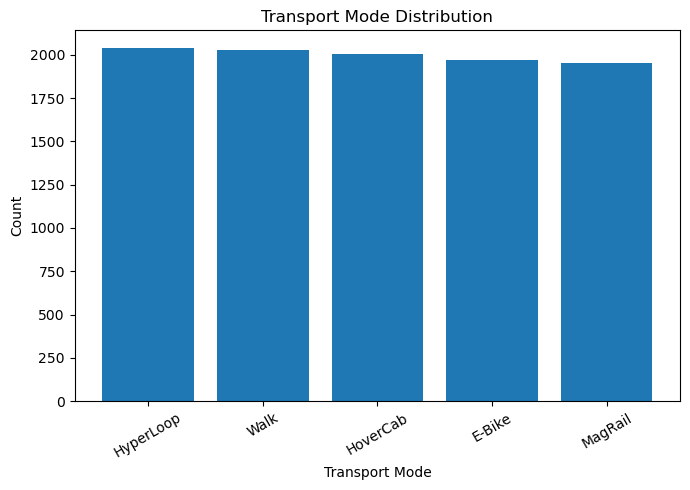

In [38]:
transport_counts = df["transport_mode"].value_counts()

plt.figure(figsize=(7,5))
plt.bar(transport_counts.index, transport_counts.values)
plt.title("Transport Mode Distribution")
plt.xlabel("Transport Mode")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Monthly Average Energy Consumption

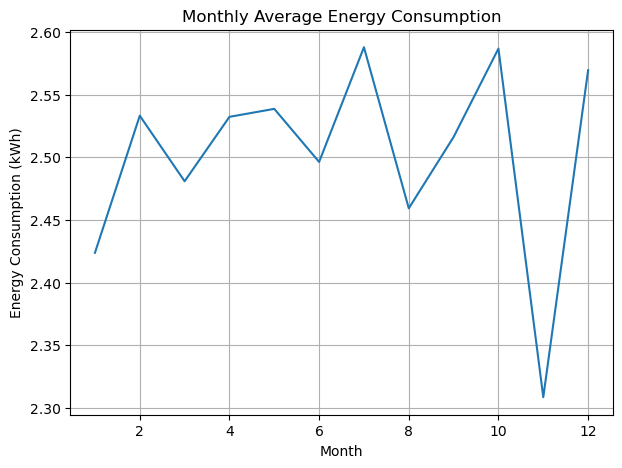

In [47]:
monthly_energy = df.groupby("month")["energy_consumption_kwh"].mean()

plt.figure(figsize=(7,5))
plt.plot(monthly_energy)
plt.title("Monthly Average Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Energy Consumption (kWh)")
plt.grid()
plt.show()


#### Environmental Stress Score by City Zone

<Figure size 900x500 with 0 Axes>

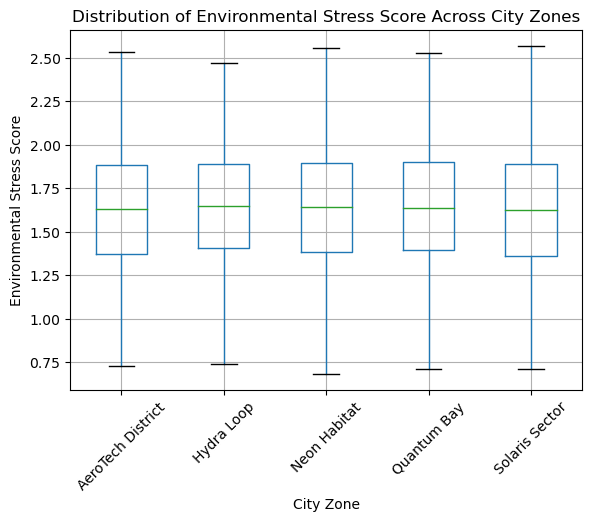

In [42]:
plt.figure(figsize=(9,5))
df.boxplot(column='environmental_stress_score', by='city_zone')
plt.title('Distribution of Environmental Stress Score Across City Zones')
plt.suptitle('')
plt.xlabel('City Zone')
plt.ylabel('Environmental Stress Score')
plt.xticks(rotation=45)
plt.show()


#### Peak vs Off-Peak Energy Consumption 

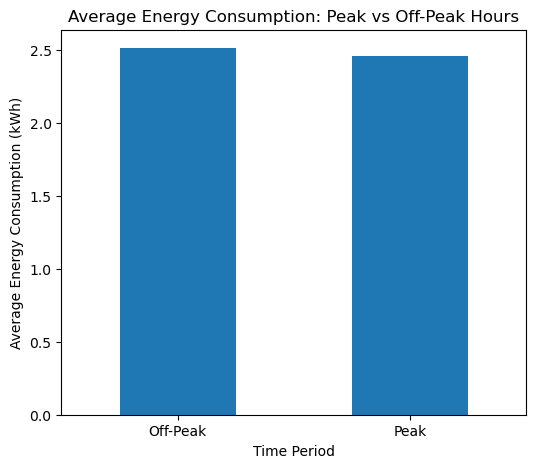

In [41]:
plt.figure(figsize=(6,5))
df.groupby('is_peak_hour_num')['energy_consumption_kwh'].mean().plot(kind='bar')
plt.title('Average Energy Consumption: Peak vs Off-Peak Hours')
plt.xlabel('Time Period')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks([0,1], ['Off-Peak', 'Peak'], rotation=0)
plt.show()


### Hourly Patterns: Energy, Crowd Density & Noise Level 

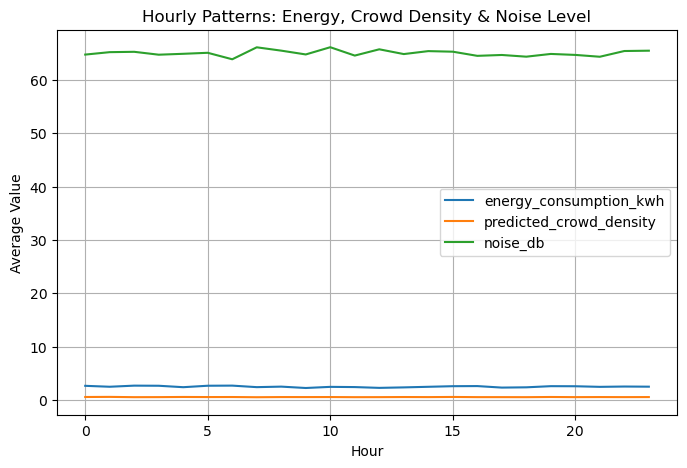

In [48]:
hourly_patterns = df.groupby("hour")[["energy_consumption_kwh", 
                                      "predicted_crowd_density",
                                      "noise_db"]].mean()

hourly_patterns.plot(kind='line', figsize=(8,5))
plt.title("Hourly Patterns: Energy, Crowd Density & Noise Level")
plt.xlabel("Hour")
plt.ylabel("Average Value")
plt.grid()
plt.show()


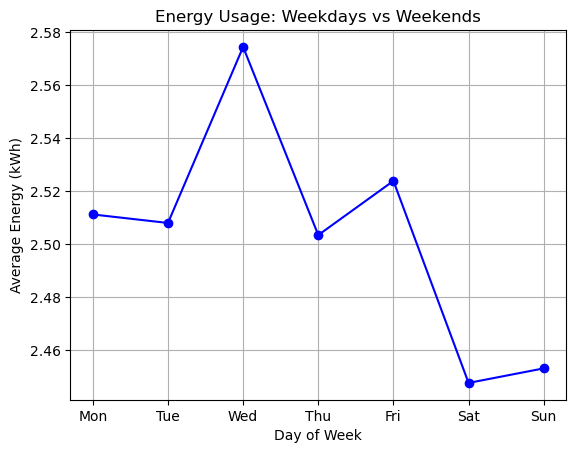

In [49]:
avg_energy = df.groupby("dayofweek")["energy_consumption_kwh"].mean()

plt.plot(avg_energy.index, avg_energy.values, 'o-', color='blue')  
plt.xticks(avg_energy.index, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])  
plt.title("Energy Usage: Weekdays vs Weekends")
plt.xlabel("Day of Week")
plt.ylabel("Average Energy (kWh)")
plt.grid(True)
plt.show()

### Temperature Trend Over Time Based on Month

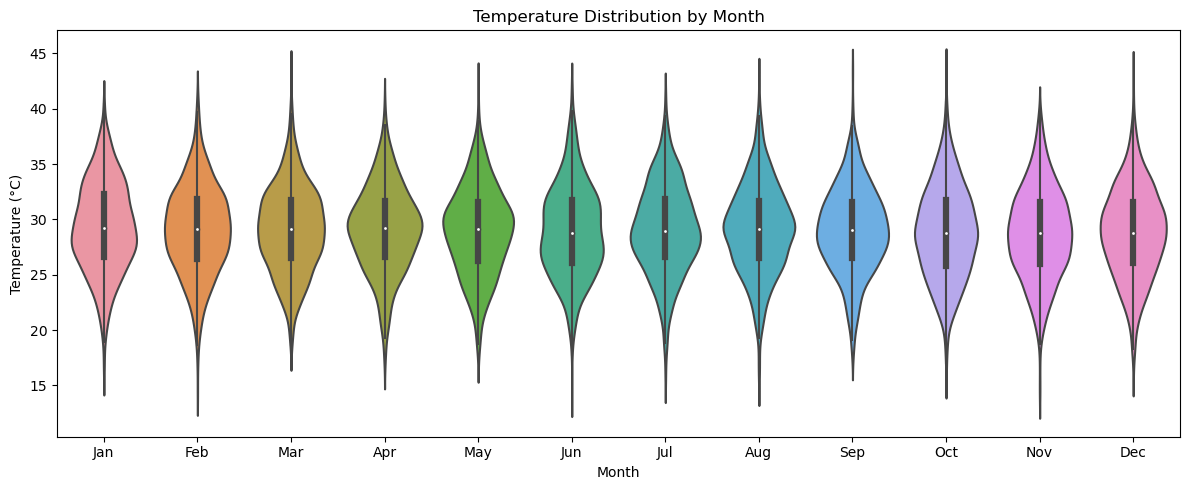

In [50]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["month"] = df["timestamp"].dt.strftime("%b")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

plt.figure(figsize=(12,5))
sns.violinplot(x="month", y="temperature_c", data=df, order=month_order)

plt.title("Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


### Temperature, AQI, Noise Level 

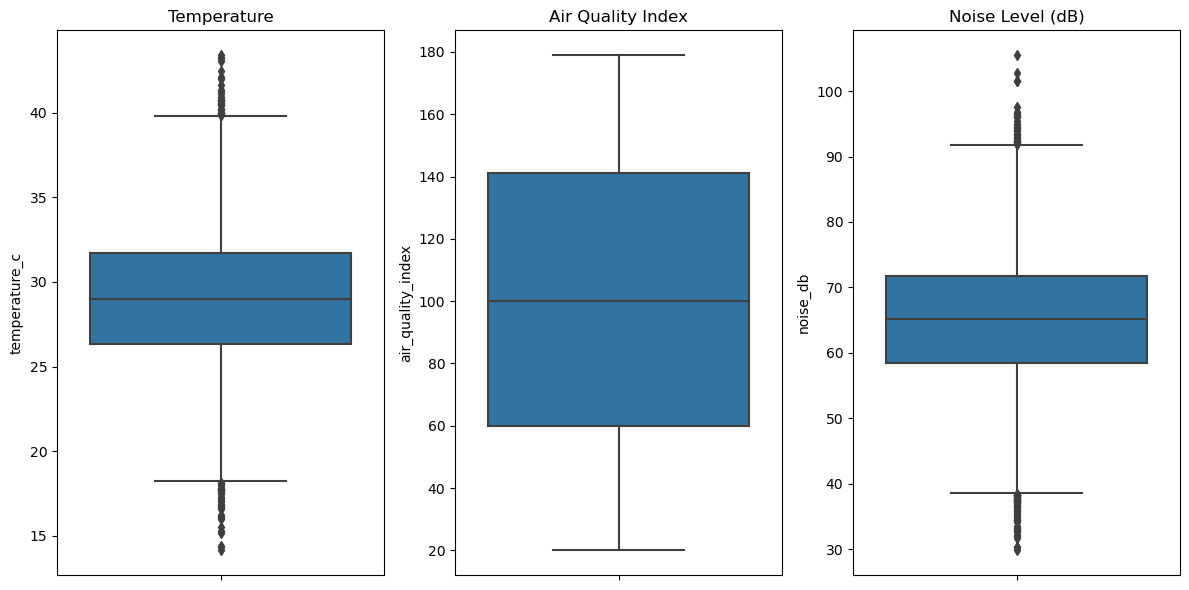

In [47]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(y=df["temperature_c"])
plt.title("Temperature")

plt.subplot(1,3,2)
sns.boxplot(y=df["air_quality_index"])
plt.title("Air Quality Index")

plt.subplot(1,3,3)
sns.boxplot(y=df["noise_db"])
plt.title("Noise Level (dB)")

plt.tight_layout()
plt.show()

### Histograms — Temperature & AQI 

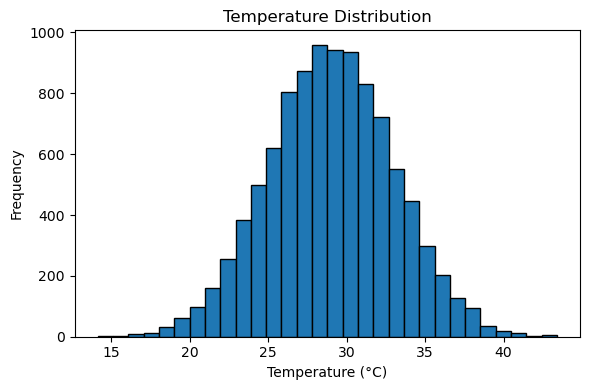

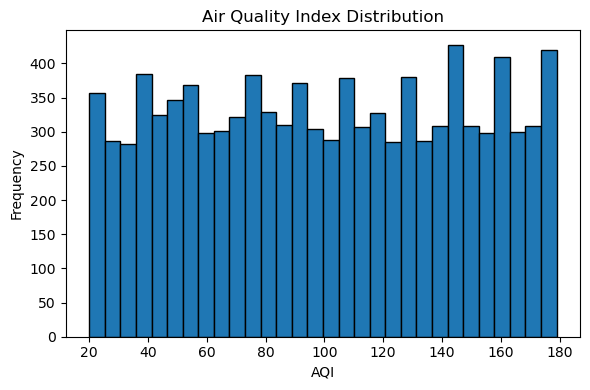

In [49]:
plt.figure(figsize=(6,4))
plt.hist(df["temperature_c"], bins=30, edgecolor="black")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["air_quality_index"], bins=30, edgecolor="black")
plt.title("Air Quality Index Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Security Alerts (0/1) 

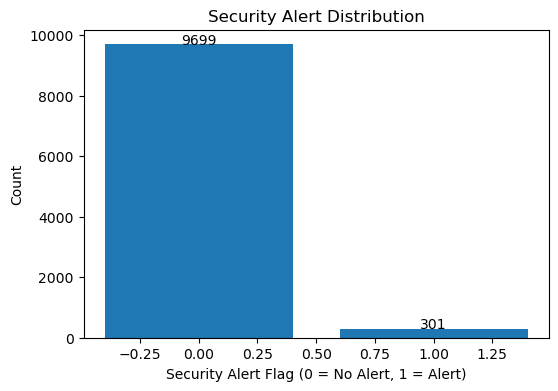

In [50]:
alert_counts = df["security_alert_flag"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(alert_counts.index, alert_counts.values)

plt.title("Security Alert Distribution")
plt.xlabel("Security Alert Flag (0 = No Alert, 1 = Alert)")
plt.ylabel("Count")

for i, v in enumerate(alert_counts.values):
    plt.text(i, v + 10, str(v), ha="center")  

plt.show()

###  Event Distribution Across City Zones

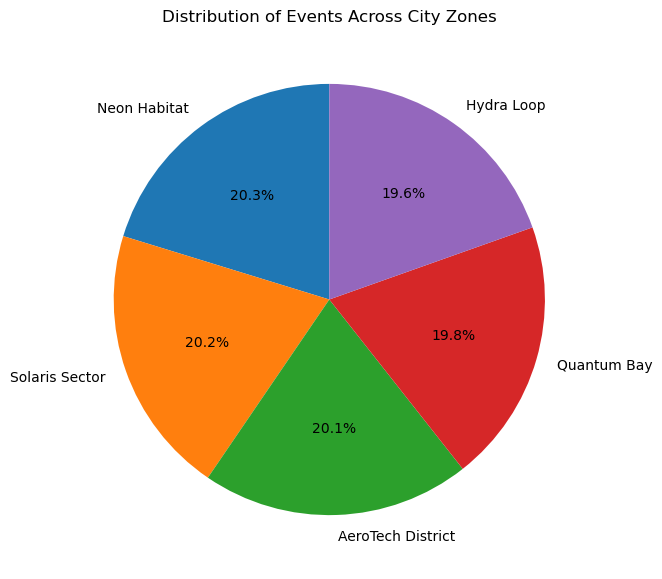

In [51]:
zone_counts = df['city_zone'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Events Across City Zones")
plt.show()

Visualizations made complex patterns easier to interpret by clearly representing distributions, comparisons, and trends across city zones and time periods. Graphical analysis enhanced understanding and supported data-driven insights derived from the dataset.

# CORRELATION HEATMAP 

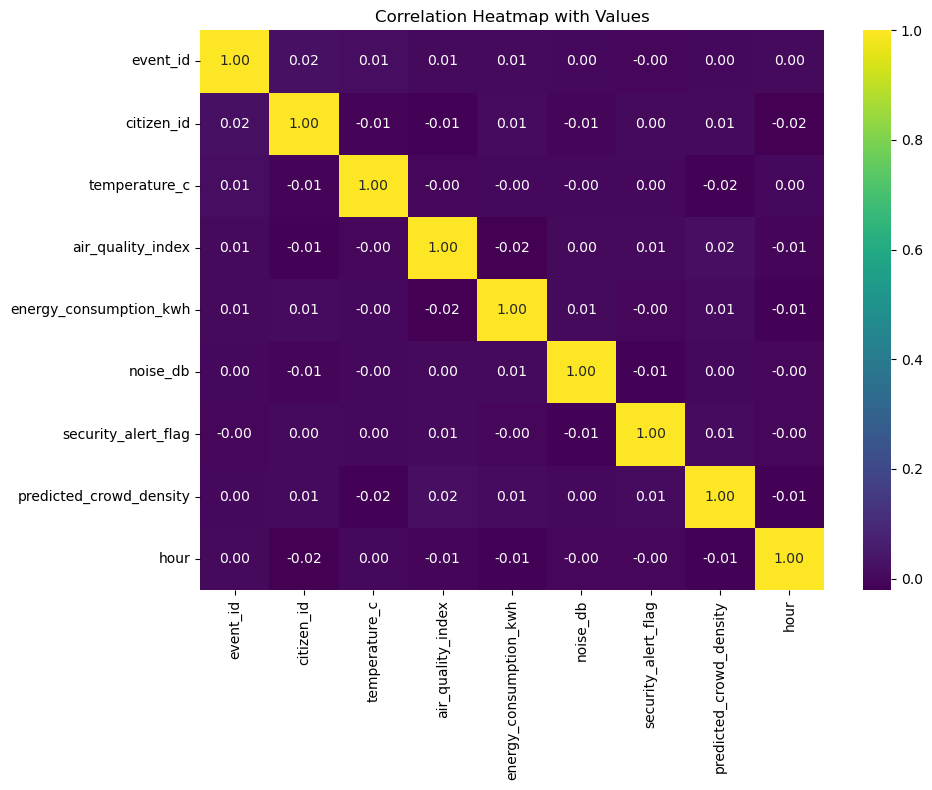

In [52]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,        
    fmt=".2f",         
    cmap="viridis",    
    cbar=True
)

plt.title("Correlation Heatmap with Values")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Temperature vs Air Quality Index 

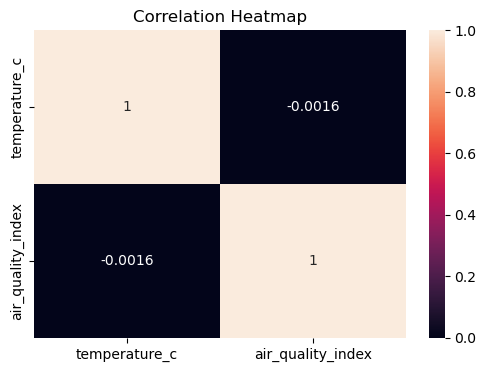

In [48]:

plt.figure(figsize=(6,4))
sns.heatmap(df[["temperature_c","air_quality_index"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap visualizes the strength and direction of relationships among numerical variables in the dataset. It shows how environmental factors, energy consumption, and crowd-related features are interrelated, while some variables exhibit weak or no correlation. This analysis helps identify key associations and supports better understanding of dependencies within the smart city data.

# CONCLUSION
The analysis of the Futuristic Smart City 2032 dataset provides a clear understanding of how environmental conditions, energy usage, human activities, and transportation systems vary across different city zones. Through EDA, we observed meaningful patterns in temperature, AQI, noise levels, and crowd density, along with how citizens move and behave in a smart city environment. These insights help explain the overall functioning of a highly connected urban ecosystem.